<a href="https://colab.research.google.com/github/ShreePurvaja/Data-Science-Notes/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01.04.2025

In [ ]:
#Logistic Regression is a classification algorithm.
#specifically used for binary classification.(target should be 0 or 1)
#it is matheatically like log but logistic means movement
#Linear regression + sigmoid function = logistic regression
#sigmoid fn - s curve within 0-1 range
#f(z) = 1/(1+e^-z) so always less than 1
#linear regression's evaluation will not work here.

In [1]:
import pandas as pd
dia=pd.read_csv("https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/diabetes.csv")
display(dia)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [43]:
x=dia[["BloodPressure","SkinThickness","BMI"]]
y=dia['Outcome']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=46)

In [44]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [45]:
y_pred=model.predict(x_test)
print(x_test)

     BloodPressure  SkinThickness   BMI
723             86             30  39.1
234             68             28  29.7
703              0              0  38.5
105             56             29  28.7
638             76             32  40.9
..             ...            ...   ...
699             70              0  44.5
484              0              0  44.2
122             74             30  33.6
716             78             39  33.8
314             80             31  35.9

[154 rows x 3 columns]


In [46]:
# prompt: create a dataframe with y pred and y test

import pandas as pd

df = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})
df


,y_pred,y_test
723,0,0
234,0,0
703,1,0
105,0,0
638,1,1
...,...,...
699,1,0
484,1,1
122,0,0
716,0,1


In [47]:
from sklearn.metrics import classification_report
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred)) #(actual,predict)


              precision    recall  f1-score   support

           0       0.70      0.87      0.78       101
           1       0.54      0.28      0.37        53

    accuracy                           0.67       154
   macro avg       0.62      0.58      0.57       154
weighted avg       0.64      0.67      0.64       154



In [48]:
# prompt: do a cross tab with y test and y pred
import pandas as pd

pd.crosstab(y_test, y_pred)


col_0,0,1
Outcome,,
0,88,13
1,38,15


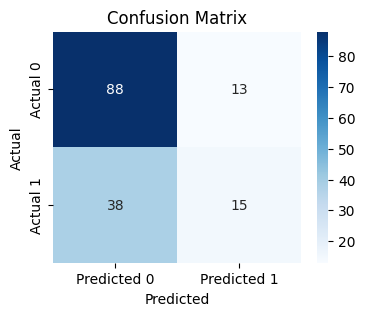

In [49]:
# prompt: draw a confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined from your previous code
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [50]:
import pandas as pd
data=pd.read_csv("https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/refs/heads/main/ChurnData.csv")
display(data)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


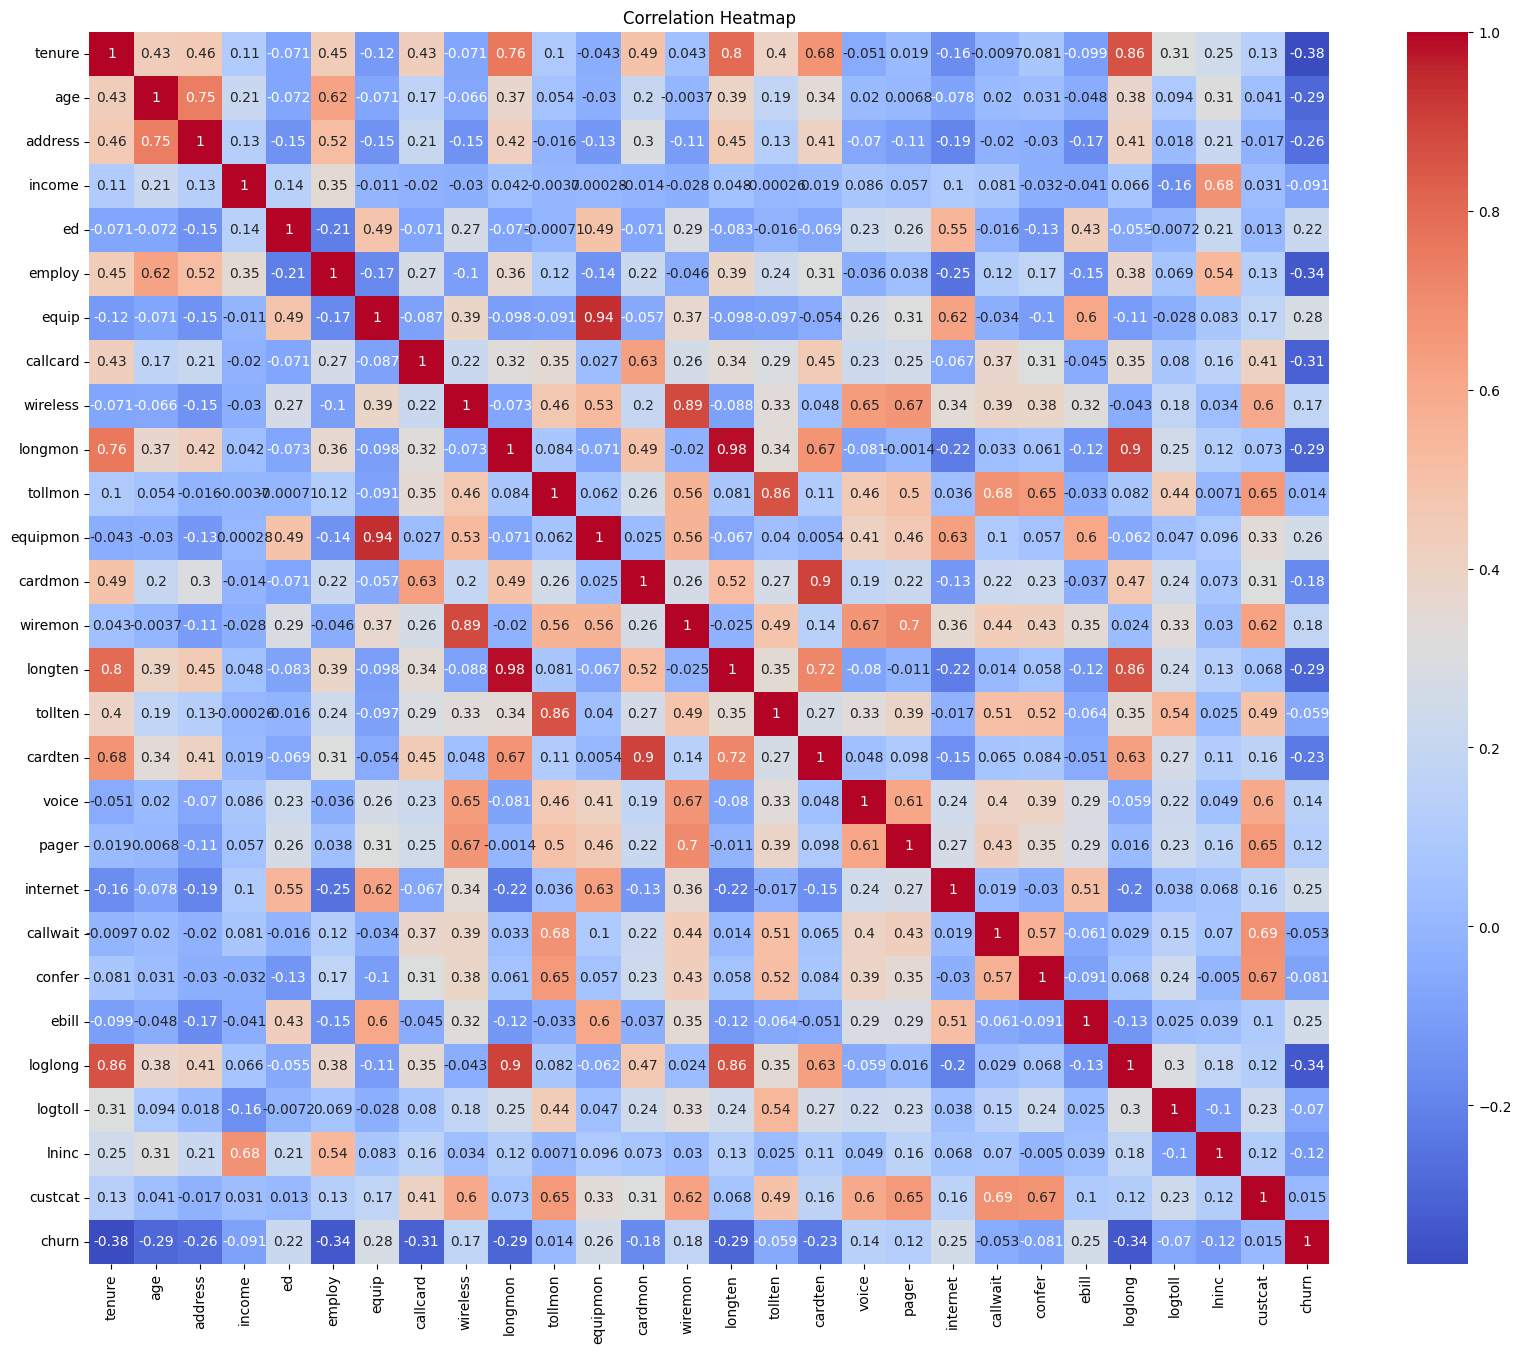

In [53]:
# prompt: draw a correlation heat map

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded from your previous code
# Replace 'data' with your actual DataFrame if the name is different.

plt.figure(figsize=(20, 16))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [80]:
x=data[['tenure','equip','equipmon','wiremon','longmon','longten']]
y=data['churn']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [81]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [82]:
y_pred=model.predict(x_test)
print(x_test)

     tenure  equip  equipmon  wiremon  longmon  longten
95     11.0    1.0     29.90     0.00     4.15    46.35
15      4.0    1.0     49.80    35.75     3.40    10.35
30     29.0    0.0      0.00     0.00     6.50   198.70
158    69.0    1.0     36.90     0.00    25.95  1812.15
128    30.0    0.0      0.00     0.00    12.40   369.45
115     9.0    1.0     39.65    20.80     4.70    26.30
69     72.0    0.0      0.00    43.95    53.75  3776.10
170    16.0    1.0     39.15    31.80     4.10    62.45
174     3.0    1.0     29.50    28.55     2.75     5.70
45     45.0    0.0      0.00     0.00     7.75   338.80
66     37.0    0.0      0.00     0.00     7.50   273.70
182    32.0    0.0      0.00     0.00     7.65   237.85
165    18.0    0.0      0.00     0.00     6.45   104.05
78     69.0    0.0      0.00     0.00    21.85  1589.10
186    20.0    0.0      0.00    27.05     4.55   115.65
177    43.0    0.0      0.00    24.95    22.05  1042.95
56     12.0    1.0     32.80     0.00     3.80  

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.89        31
         1.0       0.60      0.67      0.63         9

    accuracy                           0.82        40
   macro avg       0.75      0.77      0.76        40
weighted avg       0.83      0.82      0.83        40

